In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plot
from datetime import datetime

pd.set_option('display.max_rows',500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* Focus is always to undersand the final data structure
* Support each step by visual analytics

## John Hopkins GITHUB csv data

In [2]:
data_path = '../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [4]:
time_idx = pd_raw.columns[4:]

In [5]:
df_plot =  pd.DataFrame({'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw["Country/Region"]

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [7]:
pd_raw[pd_raw["Country/Region"]=='Germany'].iloc[:,4::].sum(axis=0)

1/22/20         0
1/23/20         0
1/24/20         0
1/25/20         0
1/26/20         0
1/27/20         1
1/28/20         4
1/29/20         4
1/30/20         4
1/31/20         5
2/1/20          8
2/2/20         10
2/3/20         12
2/4/20         12
2/5/20         12
2/6/20         12
2/7/20         13
2/8/20         13
2/9/20         14
2/10/20        14
2/11/20        16
2/12/20        16
2/13/20        16
2/14/20        16
2/15/20        16
2/16/20        16
2/17/20        16
2/18/20        16
2/19/20        16
2/20/20        16
2/21/20        16
2/22/20        16
2/23/20        16
2/24/20        16
2/25/20        17
2/26/20        27
2/27/20        46
2/28/20        48
2/29/20        79
3/1/20        130
3/2/20        159
3/3/20        196
3/4/20        262
3/5/20        482
3/6/20        670
3/7/20        799
3/8/20       1040
3/9/20       1176
3/10/20      1457
3/11/20      1908
3/12/20      2078
3/13/20      3675
3/14/20      4585
3/15/20      5795
3/16/20      7272
3/17/20   

In [8]:
country_list = ['Italy','US','Spain','Germany','Korea, South']

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw["Country/Region"]==each].iloc[:,4::].sum(axis=0))

In [10]:
df_plot

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3
5,1/27/20,0,5,0,1,4
6,1/28/20,0,5,0,4,4
7,1/29/20,0,5,0,4,4
8,1/30/20,0,5,0,4,4
9,1/31/20,2,7,0,5,11


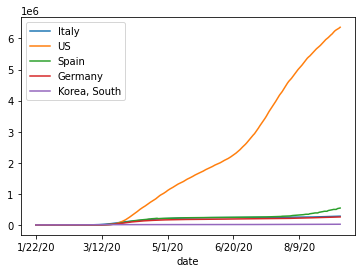

In [11]:
df_plot.set_index('date').plot()

## Data Type Date

In [12]:
df_plot.date[0]

'1/22/20'

In [13]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date] # convert to datetime
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] # convert back to date ISO norm (str)

In [14]:
df_plot['date'] = time_idx

In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv', sep=';',index=False)

## Relational data model -defining primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)

A primary key’s main features are:

It must contain a unique value for each row of data.
It cannot contain null values.

In [16]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base = pd_data_base.drop(['Lat','Long'], axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,0,0,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [17]:
test_pd = pd_data_base.set_index(['state', 'country']).T

test_pd

state           NaN                                                     \
country Afghanistan Albania Algeria Andorra Angola Antigua and Barbuda   
1/22/20           0       0       0       0      0                   0   
1/23/20           0       0       0       0      0                   0   
1/24/20           0       0       0       0      0                   0   
1/25/20           0       0       0       0      0                   0   
1/26/20           0       0       0       0      0                   0   
1/27/20           0       0       0       0      0                   0   
1/28/20           0       0       0       0      0                   0   
1/29/20           0       0       0       0      0                   0   
1/30/20           0       0       0       0      0                   0   
1/31/20           0       0       0       0      0                   0   
2/1/20            0       0       0       0      0                   0   
2/2/20            0       0       0       0      0                   0   
2/3/20            0       0       0       0      0                   0   
2/4/20            0       0       0       0      0                   0   
2/5/20            0       0       0       0      0                   0   
2/6/20            0       0       0       0      0                   0   
2/7/20            0       0       0       0      0                   0   
2/8/20            0       0       0       0      0                   0   
2/9/20            0       0       0       0      0                   0   
2/10/20           0       0       0       0      0                   0   
2/11/20           0       0       0       0      0                   0   
2/12/20           0       0       0       0      0                   0   
2/13/20           0       0       0       0      0                   0   
2/14/20           0       0       0       0      0                   0   
2/15/20           0       0       0       0      0                   0   
2/16/20           0       0       0       0      0                   0   
2/17/20           0       0       0       0      0                   0   
2/18/20           0       0       0       0      0                   0   
2/19/20           0       0       0       0      0                   0   
2/20/20           0       0       0       0      0                   0   
2/21/20           0       0       0       0      0                   0   
2/22/20           0       0       0       0      0                   0   
2/23/20           0       0       0       0      0                   0   
2/24/20           1       0       0       0      0                   0   
2/25/20           1       0       1       0      0                   0   
2/26/20           1       0       1       0      0                   0   
2/27/20           1       0       1       0      0                   0   
2/28/20           1       0       1       0      0                   0   
2/29/20           1       0       1       0      0                   0   
3/1/20            1       0       1       0      0                   0   
3/2/20            1       0       3       1      0                   0   
3/3/20            1       0       5       1      0                   0   
3/4/20            1       0      12       1      0                   0   
3/5/20            1       0      12       1      0                   0   
3/6/20            1       0      17       1      0                   0   
3/7/20            1       0      17       1      0                   0   
3/8/20            4       0      19       1      0                   0   
3/9/20            4       2      20       1      0                   0   
3/10/20           5      10      20       1      0                   0   
3/11/20           7      12      20       1      0                   0   
3/12/20           7      23      24       1      0                   0   
3/13/20           7      33      26       1      0                   1   
3/14

In [18]:
test_pd.columns

MultiIndex([(                           nan,         'Afghanistan'),
            (                           nan,             'Albania'),
            (                           nan,             'Algeria'),
            (                           nan,             'Andorra'),
            (                           nan,              'Angola'),
            (                           nan, 'Antigua and Barbuda'),
            (                           nan,           'Argentina'),
            (                           nan,             'Armenia'),
            ('Australian Capital Territory',           'Australia'),
            (             'New South Wales',           'Australia'),
            ...
            (                           nan,      'United Kingdom'),
            (                           nan,             'Uruguay'),
            (                           nan,          'Uzbekistan'),
            (                           nan,           'Venezuela'),
            (     

In [19]:
pd_relational_model = test_pd.stack(level=[0,1]).reset_index()

In [20]:
pd_relational_model = pd_relational_model.rename(columns={'level_0':'date', 0:'confirmed'})
pd_relational_model.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [21]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [22]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)